In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Import data
path = "appointment_clean.csv"

noshow_df = pd.read_csv(path)
noshow_df

,Gender,Days Diff,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Outcome
0,F,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,0,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,0,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,0,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
110510,F,35,56,MARIA ORTIZ,0,0,0,0,0,1,1
110511,F,35,51,MARIA ORTIZ,0,0,0,0,0,1,1
110512,F,41,21,MARIA ORTIZ,0,0,0,0,0,1,1
110513,F,41,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [2]:
noshow_df.dtypes

Gender           object
Days Diff         int64
Age               int64
Neighbourhood    object
Scholarship       int64
Hipertension      int64
Diabetes          int64
Alcoholism        int64
Handcap           int64
SMS_received      int64
Outcome           int64
dtype: object

In [3]:
noshow_df.nunique()

Gender             2
Days Diff        131
Age              100
Neighbourhood     81
Scholarship        2
Hipertension       2
Diabetes           2
Alcoholism         2
Handcap            5
SMS_received       2
Outcome            2
dtype: int64

In [4]:
noshow_df.isnull().sum()

Gender           0
Days Diff        0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
Outcome          0
dtype: int64

In [5]:
# One-hot encoding
noshow_df_dummies = pd.get_dummies(noshow_df)
noshow_df_dummies.dtypes

Days Diff                      int64
Age                            int64
Scholarship                    int64
Hipertension                   int64
Diabetes                       int64
                               ...  
Neighbourhood_SÃO JOSÉ          bool
Neighbourhood_SÃO PEDRO         bool
Neighbourhood_TABUAZEIRO        bool
Neighbourhood_UNIVERSITÁRIO     bool
Neighbourhood_VILA RUBIM        bool
Length: 92, dtype: object

In [6]:
noshow_df_dummies.isnull().sum()

Days Diff                      0
Age                            0
Scholarship                    0
Hipertension                   0
Diabetes                       0
                              ..
Neighbourhood_SÃO JOSÉ         0
Neighbourhood_SÃO PEDRO        0
Neighbourhood_TABUAZEIRO       0
Neighbourhood_UNIVERSITÁRIO    0
Neighbourhood_VILA RUBIM       0
Length: 92, dtype: int64

In [7]:
# Split our preprocessed data into our features and target arrays
X = noshow_df_dummies.drop('Outcome', axis=1)
y = noshow_df_dummies['Outcome']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [8]:
# Undersample overrepresented class (Show) to evenly distribute the Outcome data
resample_df = pd.concat([X, y], axis=1)

show = resample_df[resample_df['Outcome'] == 1]
no_show = resample_df[resample_df['Outcome'] == 0]

undersampled_show_count = resample(show, replace=False, n_samples = len(no_show), random_state=50)

undersampled_df = pd.concat([undersampled_show_count, no_show])

X_undersampled = undersampled_df.drop('Outcome', axis=1)
y_undersampled = undersampled_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=50)


In [9]:
undersampled_df

,Days Diff,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,...,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,Outcome
20342,0,44,0,0,0,0,0,0,True,False,...,False,False,False,False,False,False,False,False,False,1
99491,0,47,0,0,0,0,0,0,True,False,...,False,False,False,False,False,False,False,False,False,1
10054,33,73,0,0,0,0,0,0,False,True,...,False,False,False,False,False,False,False,False,False,1
70531,31,58,0,1,0,0,0,1,True,False,...,False,False,False,False,False,False,False,False,False,1
1822,11,50,0,1,0,0,0,1,True,False,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110472,4,45,0,0,0,0,0,0,True,False,...,False,False,False,False,False,False,False,False,False,0
110480,0,33,0,1,0,0,0,0,False,True,...,False,False,False,False,False,False,False,False,False,0
110484,2,37,0,1,0,0,0,0,True,False,...,False,False,False,False,False,False,False,False,False,0
110503,2,33,0,1,0,0,0,0,False,True,...,False,False,False,False,False,False,False,False,False,0


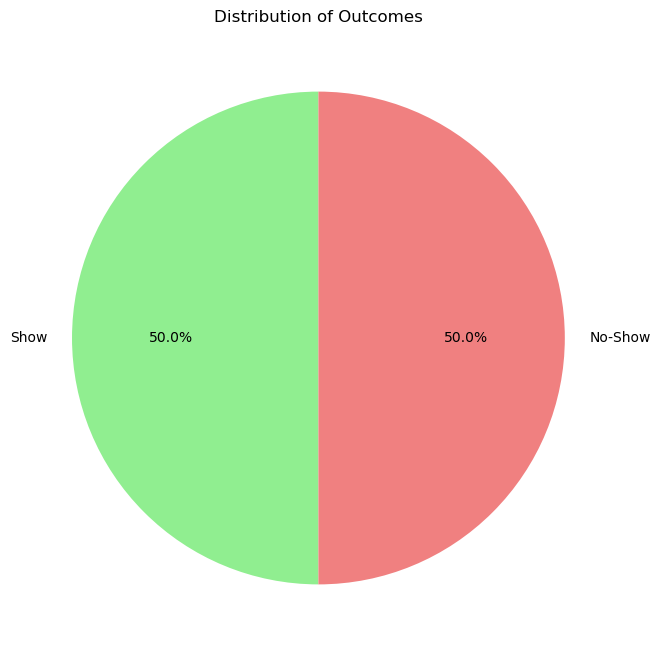

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(undersampled_df['Outcome'].value_counts(), labels=['Show', 'No-Show'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Outcomes')
plt.show()

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
len(X_train_scaled[0])

91

In [19]:
y_undersampled.value_counts()

Outcome
1    22316
0    22316
Name: count, dtype: int64

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                920       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 981
Trainable params: 981
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
 196/1116 [====>.........................] - ETA: 0s - loss: 0.7430 - accuracy: 0.5006

1116/1116 [==============================] - 2s 1ms/step - loss: 0.6910 - accuracy: 0.5572
Epoch 2/50
1116/1116 [==============================] - 1s 957us/step - loss: 0.6544 - accuracy: 0.6197
Epoch 3/50
1116/1116 [==============================] - 1s 950us/step - loss: 0.6413 - accuracy: 0.6381
Epoch 4/50
1116/1116 [==============================] - 1s 951us/step - loss: 0.6326 - accuracy: 0.6462
Epoch 5/50
1116/1116 [==============================] - 1s 981us/step - loss: 0.6271 - accuracy: 0.6514
Epoch 6/50
1116/1116 [==============================] - 1s 978us/step - loss: 0.6241 - accuracy: 0.6542
Epoch 7/50
1116/1116 [==============================] - 1s 984us/step - loss: 0.6209 - accuracy: 0.6550
Epoch 8/50
1116/1116 [==============================] - 1s 986us/step - loss: 0.6191 - accuracy: 0.6577
Epoch 9/50
1116/1116 [==============================] - 1s 990us/step - loss: 0.6169 - accuracy: 0.6597
Epoch 10/50
1116/1116 [==============================] - 1s 1ms/step - loss: 

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

279/279 - 0s - loss: 0.6108 - accuracy: 0.6699 - 394ms/epoch - 1ms/step
Loss: 0.6108115911483765, Accuracy: 0.6698778867721558


In [18]:
# Make predictions on the scaled test set
y_probabilities = nn.predict(X_test_scaled)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_probabilities > 0.5).astype(int)

# Flatten predictions to 1D array
y_pred = y_pred.flatten()

# Print classification report
print(classification_report(y_test, y_pred))

279/279 [==============================] - 0s 778us/step
              precision    recall  f1-score   support

           0       0.63      0.80      0.71      4453
           1       0.73      0.54      0.62      4474

    accuracy                           0.67      8927
   macro avg       0.68      0.67      0.66      8927
weighted avg       0.68      0.67      0.66      8927

